In [375]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [186]:
df = pd.read_excel(r'C:\Input.xlsx')
df.head()

,Rank,Restaurant,Quality Score,Postal Code,City,Open for Lunch,Open for Dinner,Open for Midday,Plant Holidays,Price Per Person-Euro,Number of Courses,Chef,Culinary Category,Stars
0,1,Aqua,118.7,38440\n \n /\n ...,Wolfsburg,Yes,Yes,Yes,Yes,255.0,14.0,Sven Elverfeld,Innovative Cuisine,5
1,2,GästeHaus Klaus Erfort,118.2,66121\n \n /\n ...,Saarbrücken,Yes,Yes,Yes,Yes,205.0,9.0,Klaus Erfort,modern classic Cuisine,5
2,3,Überfahrt,117.9,83700\n \n /\n ...,Rottach-Egern,Yes,Yes,Yes,Yes,309.0,7.0,Christian Jürgens,Innovative Cuisine,5
3,3,Victor's Fine Dining by Christian Bau,117.9,66706\n \n /\n ...,Perl,Yes,Yes,Yes,Yes,265.0,9.0,Christian Bau,Innovative Cuisine,5
4,5,Sonnora,117.7,54518\n \n /\n ...,Dreis,Yes,Yes,Yes,Yes,230.0,9.0,Clemens Rambichler,Classic gourmet cuisine Cuisine,5


In [187]:
#Remove unwanted symbols in the postal code values 
df['Postal Code'] = df ['Postal Code'].astype(str).str[:5]

In [188]:
#Let's check that the Postal Code column contains only proper values
df.head()

,Rank,Restaurant,Quality Score,Postal Code,City,Open for Lunch,Open for Dinner,Open for Midday,Plant Holidays,Price Per Person-Euro,Number of Courses,Chef,Culinary Category,Stars
0,1,Aqua,118.7,38440,Wolfsburg,Yes,Yes,Yes,Yes,255.0,14.0,Sven Elverfeld,Innovative Cuisine,5
1,2,GästeHaus Klaus Erfort,118.2,66121,Saarbrücken,Yes,Yes,Yes,Yes,205.0,9.0,Klaus Erfort,modern classic Cuisine,5
2,3,Überfahrt,117.9,83700,Rottach-Egern,Yes,Yes,Yes,Yes,309.0,7.0,Christian Jürgens,Innovative Cuisine,5
3,3,Victor's Fine Dining by Christian Bau,117.9,66706,Perl,Yes,Yes,Yes,Yes,265.0,9.0,Christian Bau,Innovative Cuisine,5
4,5,Sonnora,117.7,54518,Dreis,Yes,Yes,Yes,Yes,230.0,9.0,Clemens Rambichler,Classic gourmet cuisine Cuisine,5


Let's check the correlation between the numerical elements:

In [189]:
df.corr()

,Rank,Quality Score,Price Per Person-Euro,Number of Courses,Stars
Rank,1.000000,-0.991789,-0.704145,-0.491443,-0.811423
Quality Score,-0.991789,1.000000,0.747639,0.500899,0.837723
Price Per Person-Euro,-0.704145,0.747639,1.000000,0.642424,0.795473
Number of Courses,-0.491443,0.500899,0.642424,1.000000,0.490049
Stars,-0.811423,0.837723,0.795473,0.490049,1.000000


Let's numerize the rest of the non-numeric values to get the insights about their possible correlation too:

In [190]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,Rank,Restaurant,Quality Score,Postal Code,City,Open for Lunch,Open for Dinner,Open for Midday,Plant Holidays,Price Per Person-Euro,Number of Courses,Chef,Culinary Category,Stars
0,1,37,118.7,137,395,0,0,0,0,255.0,14.0,550,11,5
1,2,240,118.2,283,314,0,0,0,0,205.0,9.0,332,34,5
2,3,688,117.9,449,311,0,0,0,0,309.0,7.0,100,11,5
3,3,595,117.9,290,283,0,0,0,0,265.0,9.0,90,11,5
4,5,549,117.7,221,91,0,0,0,0,230.0,9.0,127,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,28,63.0,49,332,0,0,0,0,110.0,6.0,163,13,1
696,696,379,63.0,296,81,0,0,0,0,NaN,NaN,419,24,1
697,698,130,62.8,274,389,0,0,0,0,NaN,NaN,-1,28,1
698,698,407,62.8,440,346,0,0,0,0,39.0,4.0,-1,28,1


In [191]:
#Calculationg correlation_matrix for numerized values. Default method - Pearson's.
correlation_matrix = df_numerized[['Restaurant', 'Quality Score', 'City','Price Per Person-Euro', 'Number of Courses', 'Chef',
'Culinary Category', 'Stars', 'Postal Code', 'Rank']].corr()

In [192]:
# summing the absolute values of the correlation coefficients, sorting by sum
# sorting makes correlation matrix view more user-friendly

sum_corr = abs(correlation_matrix).sum().sort_values(ascending=True).index.values
type(sum_corr)
df_final = df[sum_corr].corr()
df_final

,Restaurant,Chef,City,Postal Code,Culinary Category,Number of Courses,Stars,Rank,Price Per Person-Euro,Quality Score
Restaurant,1.000000,0.027144,-0.001396,0.124449,0.023630,0.000053,0.004556,0.009317,0.039050,-0.003112
Chef,0.027144,1.000000,0.050398,-0.068636,-0.009531,0.017291,0.040124,-0.075570,-0.025980,0.071715
City,-0.001396,0.050398,1.000000,0.239948,0.016525,-0.107081,-0.015366,0.021177,-0.034279,-0.020033
Postal Code,0.124449,-0.068636,0.239948,1.000000,0.067739,-0.121725,-0.099261,0.058807,-0.086147,-0.057454
Culinary Category,0.023630,-0.009531,0.016525,0.067739,1.000000,-0.152524,-0.180926,0.116084,-0.272190,-0.128938
Number of Courses,0.000053,0.017291,-0.107081,-0.121725,-0.152524,1.000000,0.490049,-0.491443,0.642424,0.500899
Stars,0.004556,0.040124,-0.015366,-0.099261,-0.180926,0.490049,1.000000,-0.811423,0.795473,0.837723
Rank,0.009317,-0.075570,0.021177,0.058807,0.116084,-0.491443,-0.811423,1.000000,-0.704145,-0.991789
Price Per Person-Euro,0.039050,-0.025980,-0.034279,-0.086147,-0.272190,0.642424,0.795473,-0.704145,1.000000,0.747639
Quality Score,-0.003112,0.071715,-0.020033,-0.057454,-0.128938,0.500899,0.837723,-0.991789,0.747639,1.000000


Let's visualize the correlation matrix:

Text(0.5, 1.0, 'Correlation Matrix')

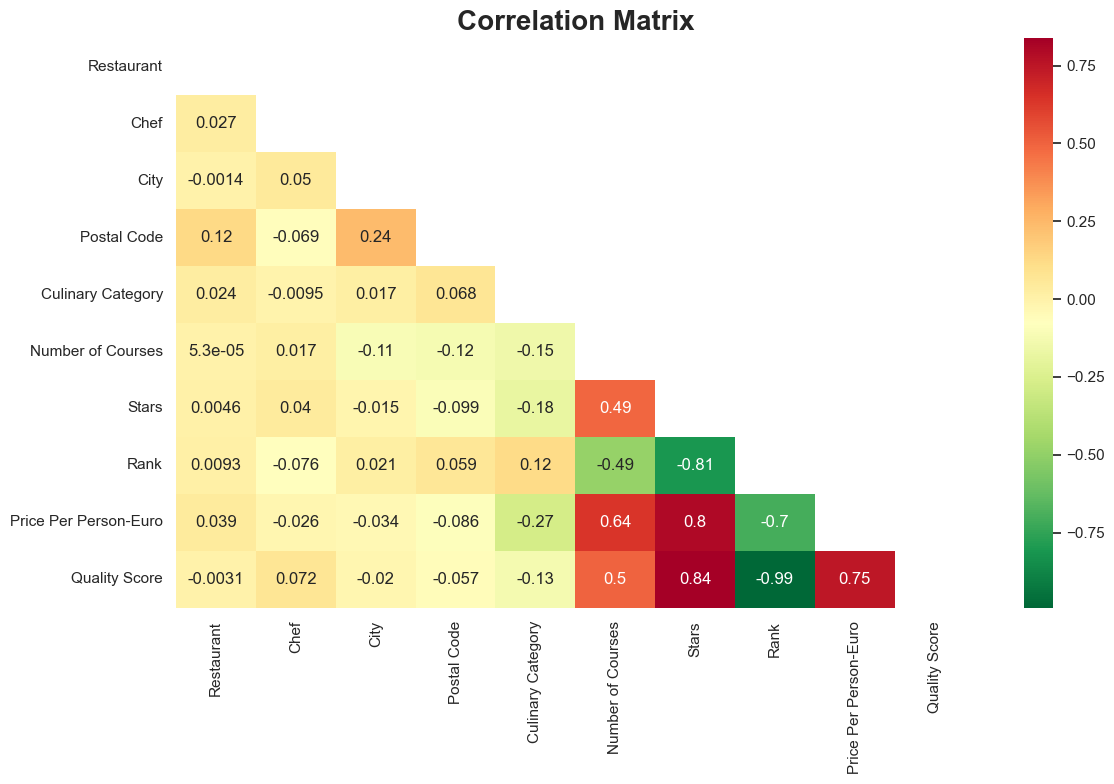

In [381]:
# Getting the Upper Triangle of the correlation matrix
matrix = np.triu(df_final)

# using the upper triangle matrix as mask 
sns.set_theme(style="white")
sns.heatmap(df_final, annot=True, mask=matrix, cmap = 'RdYlGn_r')

plt.title('Correlation Matrix', fontweight='bold', fontsize = 20)
#plt.figure (figsize= (12,8))

Correlation coefficient of more than 0.5 suggests about possible positive correlation.
Correlation coefficient of less than -0.5 suggests about possible negative correlation.

The closer it is to 1 or -1, the stronger is the correlation.

Red color means number is closer to 1, green color means number is closer to -1.

Question 1. What is the meaning of Rank values? With which parameters does it correlate?

Answer: We see the negative correlation between the rank and the quality score, number of stars. It means that the rank in the input list is not associated with those parameters. Moreover rank apperas to be the oppposite value to the quality score which indeed can be seen from the input file.

<AxesSubplot:xlabel='Quality Score', ylabel='Rank'>

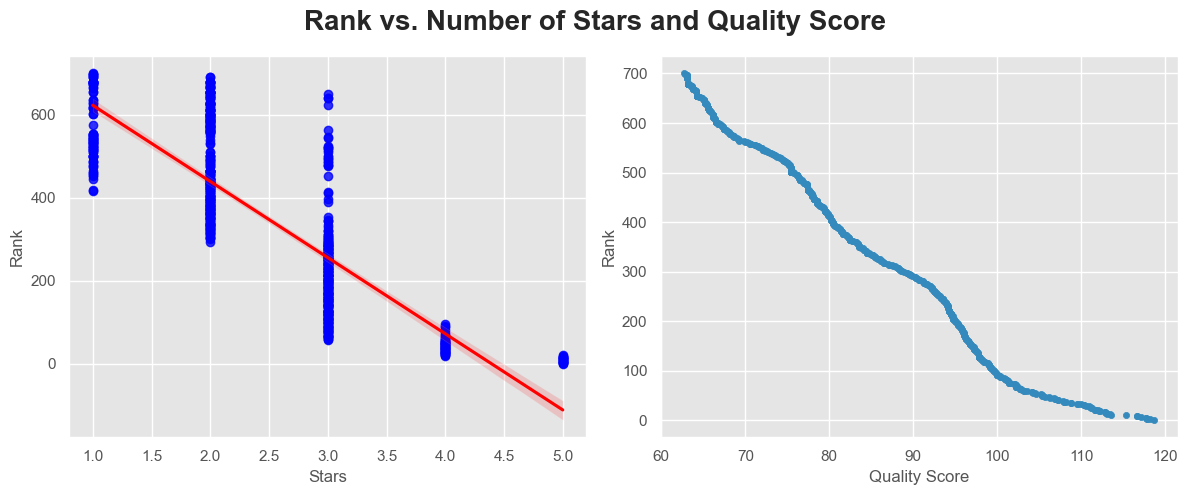

In [365]:
#Rank vs. Number of Stars and Quality Score Graphs
matplotlib.rcParams['figure.figsize'] = (12,5)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Rank vs. Number of Stars and Quality Score', fontweight='bold', fontsize = 20)

sns.regplot(y='Rank',x='Stars',data = df, scatter_kws= {'color':'blue'}, line_kws={'color':'red'}, ax=ax1)
df_numerized[['Quality Score','Rank']].plot(kind='scatter',x = 'Quality Score', y = 'Rank', ax = ax2)

Question 2: is the higher price and quality associated with the bigger number of stars? 
Answer: yes. As we see from correlation matrix the number of stars correlates with the Quality Score (0.84) and the Price(0.8). 

Question 3: Is the higher price associated with the bigger quality score?
Answer: yes. As we see from correlation matrix the Price and Quality score correlate with the coefficient 0.75.

Let's build the graphs that show relationships between number of stars, price and quality below.

In [377]:
#Gathering data for graphs with number of stars
df_star1 = df_numerized.query('Stars == 1')
df_star2 = df_numerized.query('Stars == 2')
df_star3 = df_numerized.query('Stars == 3')
df_star4 = df_numerized.query('Stars == 4')
df_star5 = df_numerized.query('Stars == 5')

In [378]:
#Create empty dataframe for box plot visualization
df_allstars = pd.DataFrame(index=range(237),columns=range(5))
df_allstars.set_axis(['1Star', '2Stars','3Stars','4Stars','5Stars'], axis='columns', inplace = True)

In [280]:
#Fill in dataframe with the prices for all stars restaraunts

df1 = df_star1['Price Per Person-Euro'].to_frame().dropna()
df1.reset_index(drop=True, inplace = True)
df2 = df_star2['Price Per Person-Euro'].to_frame().dropna()
df2.reset_index(drop=True, inplace = True)
df3 = df_star3['Price Per Person-Euro'].to_frame().dropna()
df3.reset_index(drop=True, inplace = True)
df4 = df_star4['Price Per Person-Euro'].to_frame().dropna()
df4.reset_index(drop=True, inplace = True)
df5 = df_star5['Price Per Person-Euro'].to_frame().dropna()
df5.reset_index(drop=True, inplace = True)

df_allstars['1Star'] = df1['Price Per Person-Euro']
df_allstars['2Stars'] = df2['Price Per Person-Euro']
df_allstars['3Stars'] = df3['Price Per Person-Euro']
df_allstars['4Stars'] = df4['Price Per Person-Euro']
df_allstars['5Stars'] = df5['Price Per Person-Euro']

In [343]:
#Data for Stars vs Quality Score box plot

df1q = df_star1['Quality Score'].to_frame().dropna()
df1q.reset_index(drop=True, inplace = True)
print(df1q.shape)
df2q = df_star2['Quality Score'].to_frame().dropna()
df2q.reset_index(drop=True, inplace = True)
print(df2q.shape)
df3q = df_star3['Quality Score'].to_frame().dropna()
df3q.reset_index(drop=True, inplace = True)
print(df3q.shape)
df4q = df_star4['Quality Score'].to_frame().dropna()
df4q.reset_index(drop=True, inplace = True)
print(df4q.shape)
df5q = df_star5['Quality Score'].to_frame().dropna()
df5q.reset_index(drop=True, inplace = True)
print(df5q.shape)

(84, 1)
(274, 1)
(275, 1)
(47, 1)
(20, 1)


In [379]:
#Create empty dataframe for box plot visualization of Stars vs Quality Score

df_allstars1 = pd.DataFrame(index=range(275),columns=range(5))
df_allstars1.set_axis(['1Star', '2Stars','3Stars','4Stars','5Stars'], axis='columns', inplace = True)

In [380]:
#Fill in the dataframe with the data

df_allstars1['1Star'] = df1q['Quality Score']
df_allstars1['2Stars'] = df2q['Quality Score']
df_allstars1['3Stars'] = df3q['Quality Score']
df_allstars1['4Stars'] = df4q['Quality Score']
df_allstars1['5Stars'] = df5q['Quality Score']

[Text(0, 0.5, 'Price Per Person-Euro')]

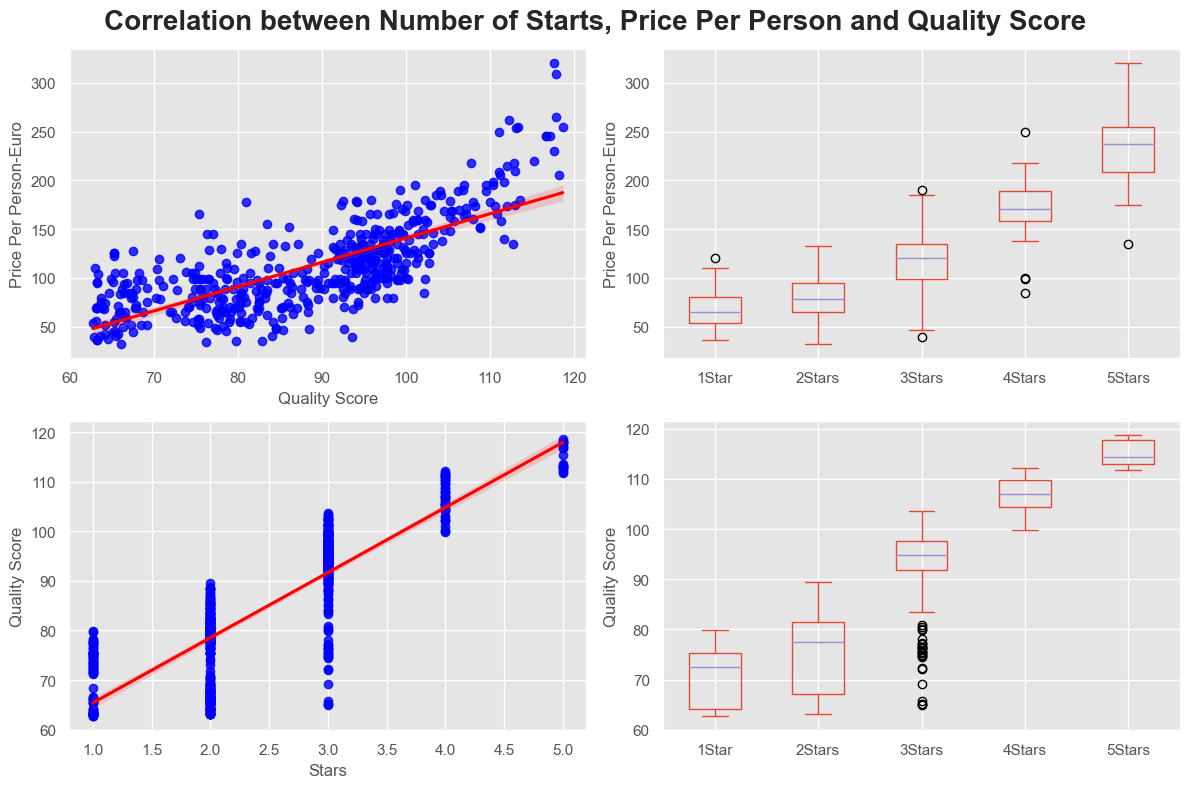

In [376]:
#Building a figure with 4 subplots

matplotlib.rcParams['figure.figsize'] = (12,8)

fig, axs = plt.subplots(2, 2)
fig.suptitle('Correlation between Number of Starts, Price Per Person and Quality Score', fontweight='bold', fontsize = 20)

sns.regplot(x='Quality Score', y='Price Per Person-Euro', data = df_numerized[['Quality Score','Price Per Person-Euro']],
            scatter_kws= {'color':'blue'}, line_kws={'color':'red'}, ax = axs[0,0])

sns.regplot(y='Quality Score', x='Stars', data = df_numerized[['Quality Score','Stars']], 
            scatter_kws= {'color':'blue'}, line_kws={'color':'red'}, ax = axs[1,0])

df_allstars1.plot(kind='box', ax=axs[1,1] )
axs[1, 1].set(ylabel='Quality Score')

df_allstars.plot(kind='box', ax=axs[0,1] )
axs[0, 1].set(ylabel='Price Per Person-Euro')
